## Implementation of linear regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import copy
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('SeoulBikeData.csv')

In [3]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [4]:
df_columns = ["bike_count","hour","temp","humidity","wind","visibility","dew_pt_temp","radiation","rain","snow","functional"]
df = pd.read_csv('SeoulBikeData.csv').drop(["Date","Holiday","Seasons"], axis=1)

In [5]:
df.columns = df_columns

In [6]:
df.head()

,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [7]:
df['functional'] = (df['functional'] == 'Yes').astype(int)

In [8]:
df.head()

,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1


In [9]:
df = df[df['hour'] == 12]
df = df.drop(['hour'], axis=1)

In [10]:
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


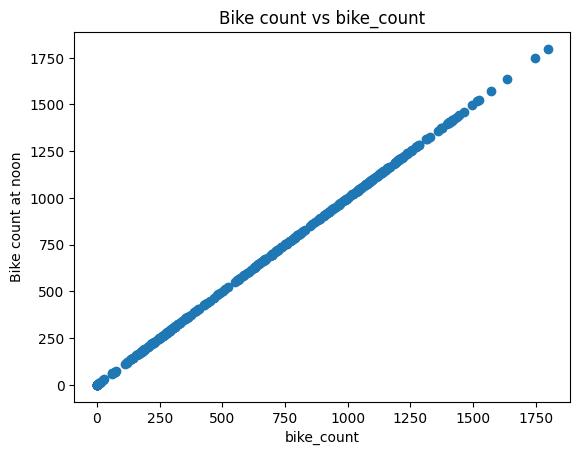

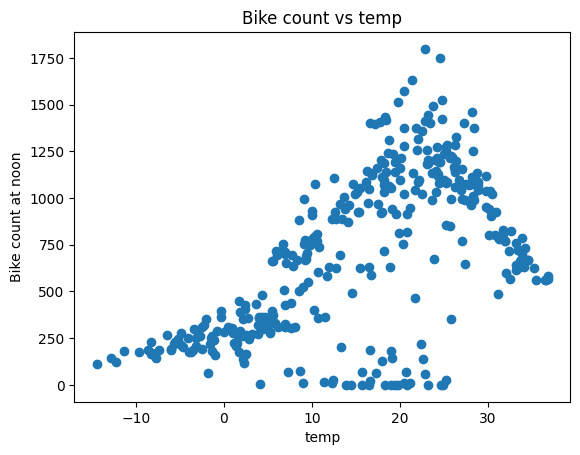

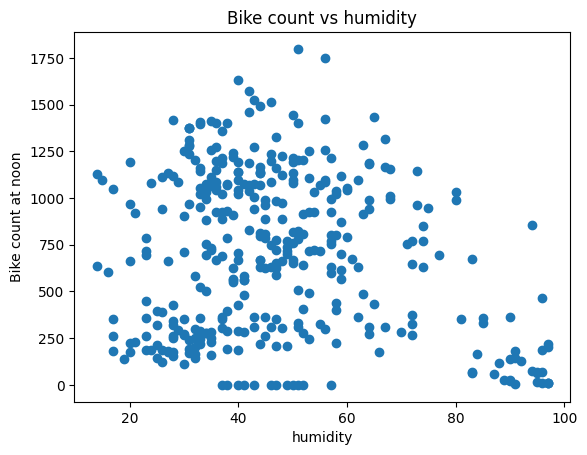

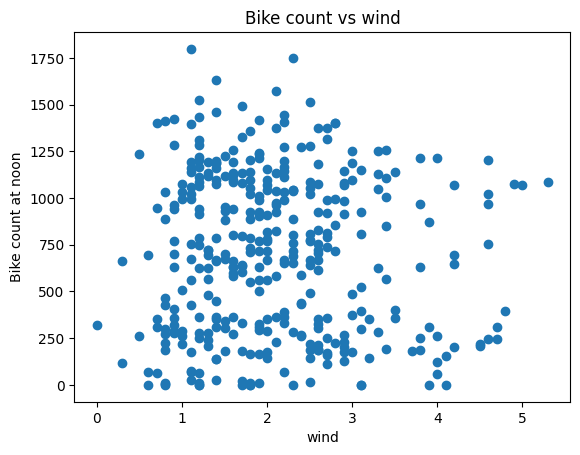

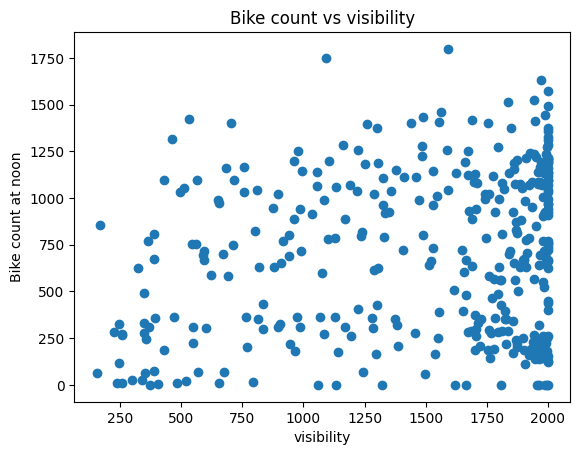

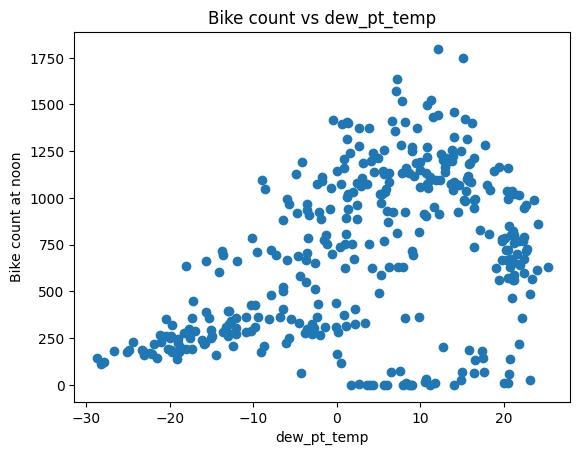

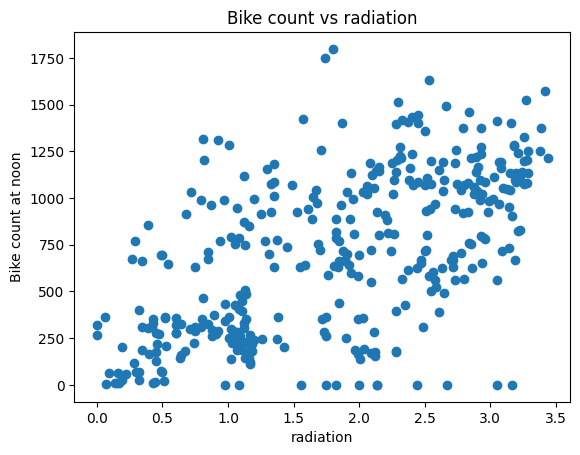

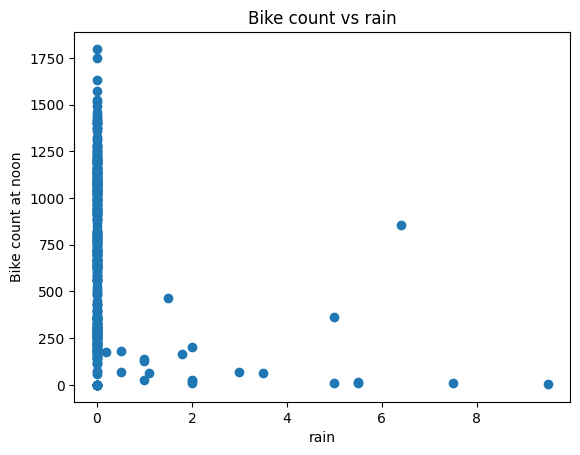

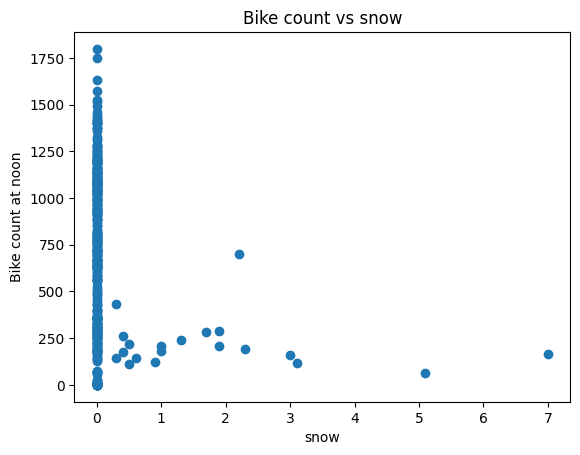

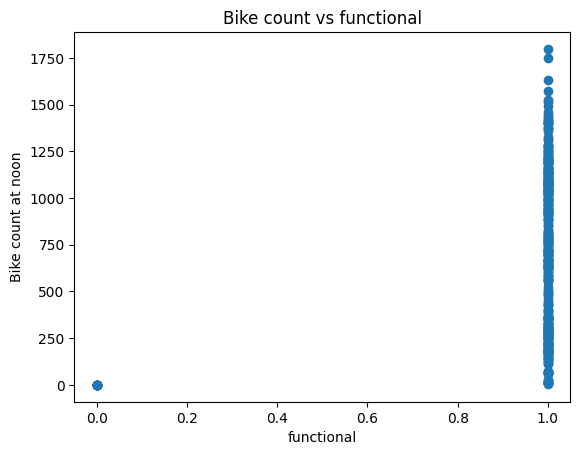

In [11]:
for label in df.columns:
   plt.scatter(df[label], df['bike_count'])
   plt.xlabel(label)
   plt.ylabel('Bike count at noon')
   plt.title(f'Bike count vs {label}')
   plt.show() 

In [12]:
df = df.drop(["wind","visibility","functional"], axis=1)

In [13]:
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


*Splitting into train/valid/test dataset*

In [14]:
train , valid , test = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])

c:\Users\Vaibhav\Desktop\Machine Learning\Machine-Learning\ml_env\lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [15]:
def get_XY(dataframe, y_label, X_labels=None):
    dataframe = copy.deepcopy(dataframe)
    if not X_labels:
        X = dataframe[[c for c in dataframe.columns if c != y_label]].values
    else:
        if len(X_labels) == 1:
            X = dataframe[X_labels[0]].values.reshape(-1, 1)
        else:
            X = dataframe[X_labels].values
    y = dataframe[y_label].values.reshape(-1, 1)
    data = np.hstack((X, y))
    return data, X, y

In [16]:
_ , X_train, y_train = get_XY(train , 'bike_count', X_labels = ["temp"] )
_ , X_valid, y_valid = get_XY(valid , 'bike_count', X_labels = ["temp"] )
_ , X_test, y_test = get_XY(test , 'bike_count', X_labels = ["temp"] )

In [17]:
temp_reg = LinearRegression()
temp_reg.fit(X_train, y_train)

LinearRegression()

In [18]:
print(temp_reg.coef_, temp_reg.intercept_)

[[19.98571634]] [375.31856679]


In [19]:
temp_reg.score(X_test, y_test)

0.3003668575747742

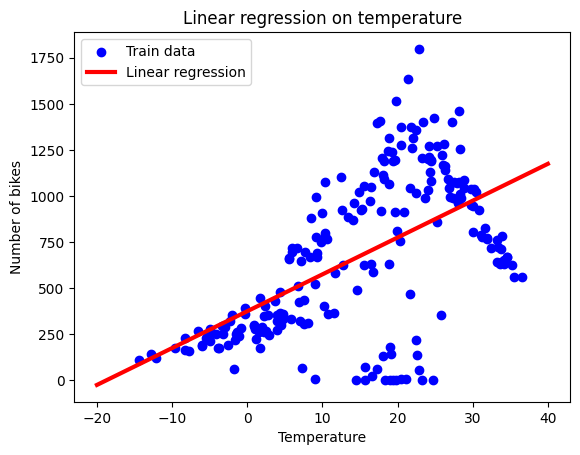

In [20]:
plt.scatter(X_train, y_train, color='blue', label='Train data')
x = tf.linspace(-20,40,100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1,1)), color='red', label='Linear regression', linewidth=3)
plt.legend()
plt.xlabel('Temperature')
plt.ylabel('Number of bikes')
plt.title('Linear regression on temperature')
plt.show()


*Multiple Linear regression*

In [21]:
df.columns

Index(['bike_count', 'temp', 'humidity', 'dew_pt_temp', 'radiation', 'rain',
       'snow'],
      dtype='object')

In [22]:
train , valid , test = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])
_ , X_train, y_train = get_XY(train , 'bike_count', X_labels = ['temp', 'humidity', 'dew_pt_temp', 'radiation', 'rain',
       'snow'] )
_ , X_valid, y_valid = get_XY(valid , 'bike_count', X_labels = ['temp', 'humidity', 'dew_pt_temp', 'radiation', 'rain',
       'snow'] )
_ , X_test, y_test = get_XY(test , 'bike_count', X_labels = ['temp', 'humidity', 'dew_pt_temp', 'radiation', 'rain',
       'snow'] )

c:\Users\Vaibhav\Desktop\Machine Learning\Machine-Learning\ml_env\lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [23]:
all_reg = LinearRegression()
all_reg.fit(X_train, y_train)

LinearRegression()

In [24]:
all_reg.score(X_test, y_test)

0.37936035466690077

*Linear regression using Neural Network*

In [25]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title('model loss')
    plt.ylabel('MSE')
    plt.xlabel('epoch')
    plt.legend()
    plt.grid(True)
    plt.show()

In [26]:
temp_normalizer = tf.keras.layers.Normalization(input_shape = (1,), axis=None)
temp_normalizer.adapt(X_train.reshape(-1))

c:\Users\Vaibhav\Desktop\Machine Learning\Machine-Learning\ml_env\lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
temp_NN = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

In [28]:
temp_NN.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mean_squared_error')

In [36]:
_, X_train, y_train = get_XY(train, 'bike_count', X_labels=["temp"])
print("X_train shape after get_XY:", X_train.shape)
print("y_train shape after get_XY:", y_train.shape)

_, X_valid, y_valid = get_XY(valid, 'bike_count', X_labels=["temp"])
print("X_valid shape after get_XY:", X_valid.shape)
print("y_valid shape after get_XY:", y_valid.shape)

X_train shape after get_XY: (219, 1)
y_train shape after get_XY: (219, 1)
X_valid shape after get_XY: (73, 1)
y_valid shape after get_XY: (73, 1)


In [37]:
print("Train shape:", train.shape)
print("Valid shape:", valid.shape)
print("Test shape:", test.shape)

Train shape: (219, 7)
Valid shape: (73, 7)
Test shape: (73, 7)


In [38]:
def get_XY(dataframe, y_label, X_labels=None):
    dataframe = copy.deepcopy(dataframe)
    if not X_labels:
        X = dataframe[[c for c in dataframe.columns if c != y_label]].values
    else:
        X = dataframe[X_labels].values
    y = dataframe[y_label].values
    # Ensure X and y have the same number of samples
    min_samples = min(len(X), len(y))
    X = X[:min_samples]
    y = y[:min_samples]
    return None, X, y

In [39]:
print("Final X_train shape:", X_train.shape)
print("Final y_train shape:", y_train.shape)
print("Final X_valid shape:", X_valid.shape)
print("Final y_valid shape:", y_valid.shape)

Final X_train shape: (219, 1)
Final y_train shape: (219, 1)
Final X_valid shape: (73, 1)
Final y_valid shape: (73, 1)


In [40]:
history = temp_NN.fit(
    X_train.reshape(-1, 1),
    y_train.reshape(-1, 1),
    epochs=1000,
    validation_data=(X_valid.reshape(-1, 1), y_valid.reshape(-1, 1)),
    verbose=0
)

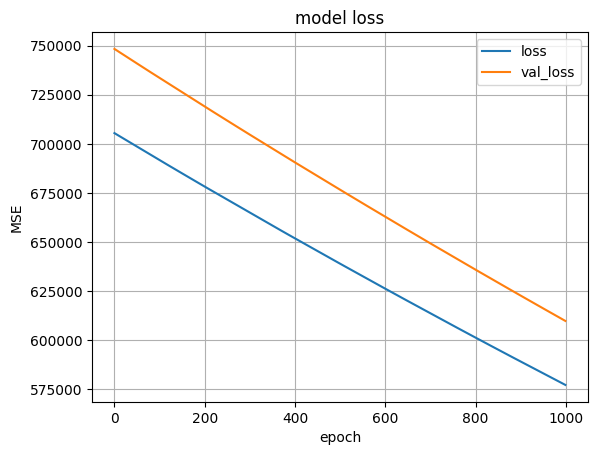

In [41]:
plot_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


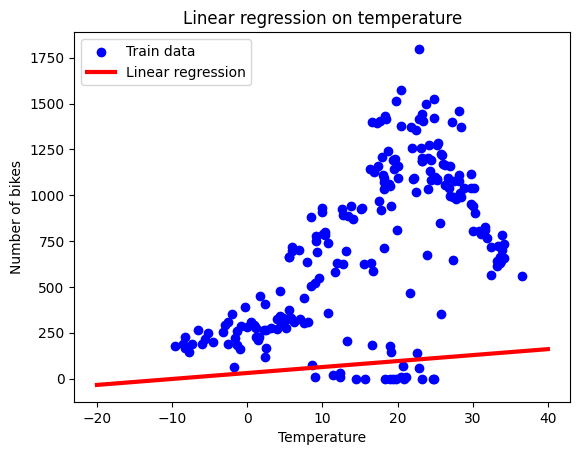

In [42]:
plt.scatter(X_train, y_train, color='blue', label='Train data')
x = tf.linspace(-20,40,100)
plt.plot(x, temp_NN.predict(np.array(x).reshape(-1,1)), color='red', label='Linear regression', linewidth=3)
plt.legend()
plt.xlabel('Temperature')
plt.ylabel('Number of bikes')
plt.title('Linear regression on temperature')
plt.show()

## Neural Network

In [46]:
temp_normalizer = tf.keras.layers.Normalization(input_shape = (1,), axis=None)
temp_normalizer.adapt(X_train.reshape(-1))
NN_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])
NN_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

c:\Users\Vaibhav\Desktop\Machine Learning\Machine-Learning\ml_env\lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [49]:
History = temp_NN.fit(
    X_train,
    y_train,
    epochs=1000,
    validation_data=(X_valid, y_valid),
    verbose=0)

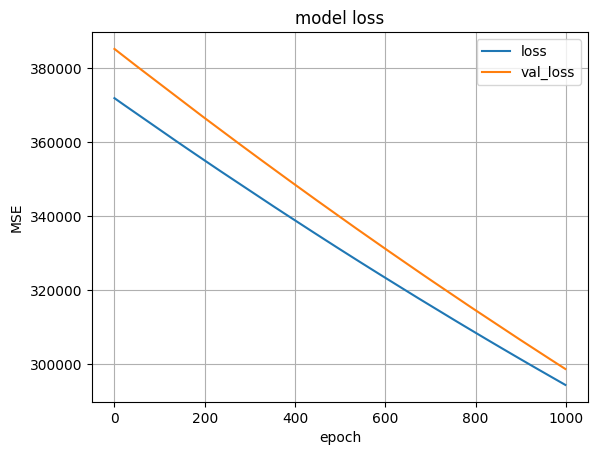

In [50]:
plot_loss(History)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


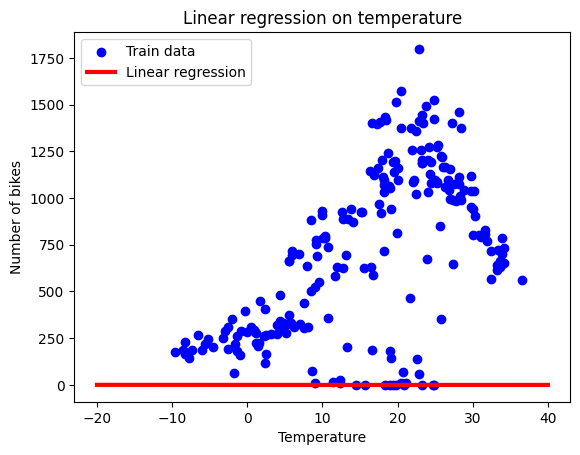

In [51]:
plt.scatter(X_train, y_train, color='blue', label='Train data')
x = tf.linspace(-20,40,100)
plt.plot(x, NN_model.predict(np.array(x).reshape(-1,1)), color='red', label='Linear regression', linewidth=3)
plt.legend()
plt.xlabel('Temperature')
plt.ylabel('Number of bikes')
plt.title('Linear regression on temperature')
plt.show()